# Libaries and Tools
All libraries and tools loaded in one convivent code block to make the following code blocks plug and play(save for the feature extraction block).

In [1]:
#TODO: Added libaries and tools
import numpy as np # for handling numbers
import pandas as pd # for handling spreadsheet data
import os # to retrive data-set files
import cv2 # computer vision for extracting features from images
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # enchancement of plotting 
import tensorflow as tf
from tensorflow.keras import models, layers # machine learning module, layers for CNN

# Feature Extraction and Processing
This puts the data in a pandas dataframe data type making it accessible for all models.
The data will be stored in seperate train and test data sets. 

In [2]:
# function to load dataset into a data frame
# Encaplsated in a function to restrict the scope of variables that will not be needed in
# later code blocks.
# gray scale flag, by default it's off
# ResizeX and ResizeY, fills these to resize image to desired size, if either
# is 0 it's assumed to be off

def loadData(grayscale:bool = False, resizeX: int = 0, resizeY = 0):
    # helper function to fill the data variables with data from images
    def fillData(data: dict,dir: str, label:str):
        # list of all files in dir
        # these values are the image files
        list = os.listdir(dir)
        # append image paths and labels in data dictionary
        for image in list:
            absImagePath = os.path.join(dir,image)
            data['image'].append(absImagePath)
            data['label'].append(label)
            fileImage = cv2.imread(absImagePath)
            # image gray scale
            if(grayscale == True):
                fileImage = cv2.cvtColor(fileImage,cv2.COLOR_BGR2GRAY)
            if(resizeX > 0 and resizeY > 0):
                target_size = (resizeX,resizeY)
                fileImage = cv2.resize(fileImage,target_size)
            # if it's color mode, reshape into 3-tuples(RGB)
            if(grayscale == False):
                data['features'].append(fileImage.reshape((-1,3)))
            # else if it's gray scale, just flatten it
            else: data['features'].append(fileImage.flatten())
            
    # dictionary to temporary house the data
    # image = image path list, label = fake or real
    trainData = {'image':[],'label':[], 'features':[]}
    testData = {'image':[],'label':[], 'features':[]}
   
    # Read Train folder & Read test folder
    # OS module used to ensure this works on all platforms that python runs on
    currentDir = os.getcwd() # get's current directory to later append to image filepath for abs path
    trainDirReal = os.path.join(currentDir,"train",'REAL') # abs file path to real class folder in training
    trainDirFake = os.path.join(currentDir,'train','FAKE')
    testDirReal = os.path.join(currentDir,"test",'REAL')
    testDirFake = os.path.join(currentDir,"test",'FAKE')  


    # helper function read file list from each folder and append abs path and labels
    fillData(trainData,trainDirReal,'REAL')
    fillData(trainData,trainDirFake,'FAKE')
    fillData(testData,testDirReal,'REAL')
    fillData(testData,testDirFake,'FAKE')
        
    # converts from dictionary type to dataframe for ease of access and compadability with
    # ML library function calls
    return pd.DataFrame(trainData), pd.DataFrame(testData)
# executes function, returning 2 dataframes containing train and test data of both classes
# Train and test data are seperated into different dataframes to enforce data hygiene 
trainData,testData = loadData()
# test if data was loaded successfully by outputing first 10 entries
trainData.head(10)

,image,label,features
0,c:\Users\bryan\Documents\Programming\Git\ML-Pr...,REAL,"[[146, 166, 124], [137, 142, 80], [218, 189, 8..."
1,c:\Users\bryan\Documents\Programming\Git\ML-Pr...,REAL,"[[237, 218, 227], [219, 205, 211], [209, 202, ..."
2,c:\Users\bryan\Documents\Programming\Git\ML-Pr...,REAL,"[[195, 174, 176], [193, 175, 176], [194, 176, ..."
3,c:\Users\bryan\Documents\Programming\Git\ML-Pr...,REAL,"[[74, 102, 133], [0, 23, 53], [3, 20, 47], [35..."
4,c:\Users\bryan\Documents\Programming\Git\ML-Pr...,REAL,"[[181, 165, 152], [182, 166, 153], [183, 167, ..."
5,c:\Users\bryan\Documents\Programming\Git\ML-Pr...,REAL,"[[56, 37, 29], [48, 31, 22], [81, 63, 56], [17..."
6,c:\Users\bryan\Documents\Programming\Git\ML-Pr...,REAL,"[[90, 92, 92], [86, 88, 88], [66, 67, 71], [86..."
7,c:\Users\bryan\Documents\Programming\Git\ML-Pr...,REAL,"[[160, 211, 207], [156, 207, 200], [178, 222, ..."
8,c:\Users\bryan\Documents\Programming\Git\ML-Pr...,REAL,"[[110, 98, 98], [112, 100, 100], [115, 102, 10..."
9,c:\Users\bryan\Documents\Programming\Git\ML-Pr...,REAL,"[[252, 252, 255], [250, 253, 255], [243, 251, ..."


# Exploratory Analysis
We can analysis the data set to justify the rationale of certains models. This can be down in the python code block below and even split across blocks.

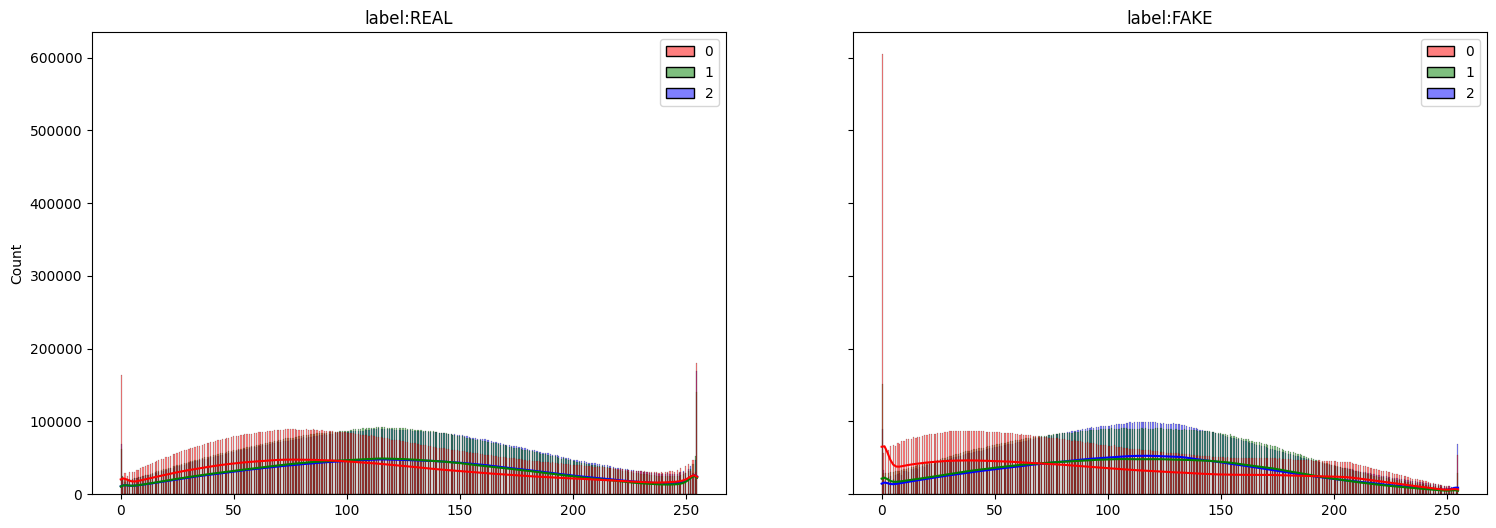

In [47]:
def EDA():
    # df = total dataset
    df = pd.concat([trainData,testData])
    classes = list(df['label'].unique())

    fig,axes = plt.subplots(1,len(classes),figsize=(18,6),sharey=True)
    for i, clas in enumerate(classes):
        # get per-class image list
        classData = df[df['label'] == clas]['features']
        # combine all class data into one array for sns plotting
        classData = np.concatenate(classData.values)
        # plot the data
        sns.histplot(classData,ax=axes[i],kde=True, palette={0:'red',1:'green',2:"blue"})
        # set title for each subplot
        axes[i].set_title(f'label:{clas}')
EDA()

# Models
We segment models in different code blocks and clearly label them in markdown and even explain results.

## Kerais CNN Model
To be fixed in future, see other cnn below

In [20]:
'''
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision,Recall
import tensorflow.keras.backend as K
from sklearn.preprocessing import LabelEncoder

# credit to  https://www.datacamp.com/tutorial/cnn-tensorflow-python 
# used as a reference for using kerais module to build a CNN
# Build the Keras model
model = models.Sequential()
# number of classes in the dataset, both training and testing set have the same classes
numClass = len((trainData['label'].unique()))
# convert labels to numerical ints
xLabels = LabelEncoder().fit_transform(trainData['label'])
yLabels = LabelEncoder().fit_transform(testData['label'])
# convert to 1-hot vector
xLabels = to_categorical(xLabels,numClass) 
yLabels = to_categorical(yLabels,numClass) 

#TODO: Dynamically adjust to grayscale, color and size.
inputShape = (32,32,3)
F1Size = 32
F2Size = 64
FShape = (3,3)
poolShape=(2,2)
FCNum = 128


# Model architecture implementation
model = models.Sequential()
model.add(layers.Conv2D(F1Size, FShape, activation='relu', input_shape=inputShape))
model.add(layers.MaxPooling2D(poolShape))
model.add(layers.Conv2D(F2Size, FShape, activation='relu'))
model.add(layers.MaxPooling2D(poolShape))
model.add(layers.Flatten())
model.add(layers.Dense(FCNum, activation='relu'))
model.add(layers.Dense(numClass, activation='softmax'))

BATCH_SIZE = 32
EPOCHS = 30

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

xFeaturesTensor = tf.constant(np.vstack(trainData['features']))
yFeaturesTensor = tf.constant(np.vstack(testData['features']))
#TODO: Fix CNN
# Train the model
training_history = model.fit(xFeaturesTensor, xLabels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(yFeaturesTensor, yLabels))
'''

c:\Users\bryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 20480000
'y' sizes: 20000


# CNN Model
Made following https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65

In [21]:
# Base class (abstract)
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError
# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        # random weights prevent dead nuerons instead of 0 weights.
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5


    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        # this is Z = feature vec + weight vec  but with an additional addition weight(known as a bias)
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    # dE/dW -> weight gradient, dE/dB -> bias gradient.
    # dE/dX -> dE/dY for previous layer 
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error.
        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error
    # inherit from base class Layer
class ActivationLayer(Layer):
    # activation = activation function...
    # activation prime = derivative of activation function
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error,learning_rate):
        return self.activation_prime(self.input) * output_error
# specialized softmax layer taken from 12.2 practice tutorial with minor modifications
class SoftmaxLayer(Layer):
    def __init__(self, input_size):
        self.input_size = input_size
    # forward_propagation replaced with numerically stable forward propagation
    def forward_propagation(self, input):
        self.input = input
        temp = np.exp(input - np.max(input))
        self.output = temp / np.sum(temp)
        return self.output
    
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)
# activaction function
def softmax(input):
        temp = np.exp(input - np.max(input))
        out = temp / np.sum(temp)
        return out
# standalone derivative of softmax(vectorized)
def softmax_prime(input): 
    s = input.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

# activation function 
def tanh(x):
    return np.tanh(x)
# and its derivative
def tanh_prime(x):
    return 1-np.tanh(x)**2
# loss function and its derivative

# mse = mean square error loss function
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))
# derivative of mse
def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss fun & d to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)
        
        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples      
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))
    # mean squared error & derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size
# cat loss & derivative
def cat(y_true,y_pred):
    return -np.sum(y_true * np.log(y_pred + 10**-100))

def cat_prime(y_true,y_pred):
    return -y_true/(y_pred + 10**-100)

def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

# additional modules
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,f1_score

# convert string labels to numerical ints
yTrain = LabelEncoder().fit_transform(trainData['label'])
yTest = LabelEncoder().fit_transform(testData['label'])
# turn labels into  1-hot vectors
yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)
xTrain = (testData['features'].values)
xTest = (testData['features'].values)

# network class that manages the nueral network layers
net = Network()
# reshape xTrain into (1, num+samples) instead of (num_samples)
xTrain = xTrain.reshape((1,-1))
print(xTrain.shape)

net.add(FCLayer(xTrain.shape[1],100))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(100, 50))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(50, 5))
net.add(SoftmaxLayer(5))

net.use(cat,cat_prime)
# fitting the line to data
# these parameters were determine by repeated testing
net.fit(xTrain,yTrain,epochs=250,learning_rate=0.01)

# raw softmax vectors, with probability per class of the given index 
raw_predictions = net.predict(xTest)
# extract classes from predictions
predictions = []
for ray in raw_predictions:
    predictions.append(np.argmax(ray))

# test and score the model
print(classification_report(yTest, predictions))
print('-'*55) # prints 55 dashes
print('Confusion Matrix\n')
print(confusion_matrix(yTest, predictions))
print(f1_score(yTest, predictions,average='micro'))


(1, 10000)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()